In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [2]:
# Use the MNIST dataset for demonstration
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the input shape (e.g., for grayscale images of size 28x28)
input_shape = (28, 28, 1)

# Encoder
input_img = Input(shape=input_shape, name="Input_Layer")
x = Conv2D(32, (3, 3), activation='relu', padding='same', name="Encoder_Conv1")(input_img)
x = MaxPooling2D((2, 2), padding='same', name="Encoder_MaxPool1")(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name="Encoder_Conv2")(x)
encoded = MaxPooling2D((2, 2), padding='same', name="Encoder_MaxPool2")(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name="Decoder_Conv1")(encoded)
x = UpSampling2D((2, 2), name="Decoder_UpSample1")(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name="Decoder_Conv2")(x)
x = UpSampling2D((2, 2), name="Decoder_UpSample2")(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name="Output_Layer")(x)

In [4]:
# Autoencoder Model
autoencoder = Model(input_img, decoded, name="CNN_Autoencoder")
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
autoencoder.summary()

Model: "CNN_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder_Conv1 (Conv2D)               │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder_MaxPool1 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder_Conv2 (Conv2D)               │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder_MaxPool2 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder_Conv1 (Conv2D)               │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder_UpSample1 (UpSampling2D)     │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder_Conv2 (Conv2D)               │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder_UpSample2 (UpSampling2D)     │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Conv2D)                │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the autoencoder
autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1105 - val_loss: 0.0681
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0677 - val_loss: 0.0656
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0656 - val_loss: 0.0645
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0647 - val_loss: 0.0639
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0640 - val_loss: 0.0638
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0635 - val_loss: 0.0629
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0631 - val_loss: 0.0626
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0629 - val_loss: 0.0627
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0627 - val_loss: 0.0623
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0627 - val_loss: 0.0622


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


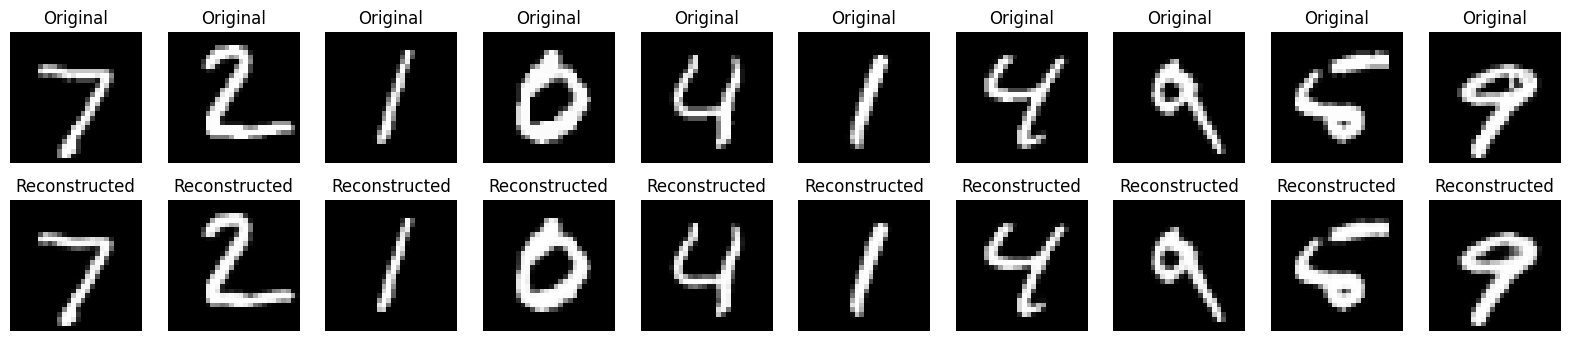

In [7]:
# Visualize the results
import matplotlib.pyplot as plt

# Encode and decode some images
decoded_imgs = autoencoder.predict(x_test[:10])

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()